<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module06_02_auto-encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Autoencoder Neural Networks


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip
import pandas

import neuralnetworks_torch as nntorch

If we train a network to learn an identify function, meaning that its output is trained to match as closely as possible its input, then we have an autoencoder.  "auto" means to duplicate itself (its input).  "encoder"  means that we are encoding the input in the hidden layers in a way that preserves as much informaton as possible to regenerate the input as the output.

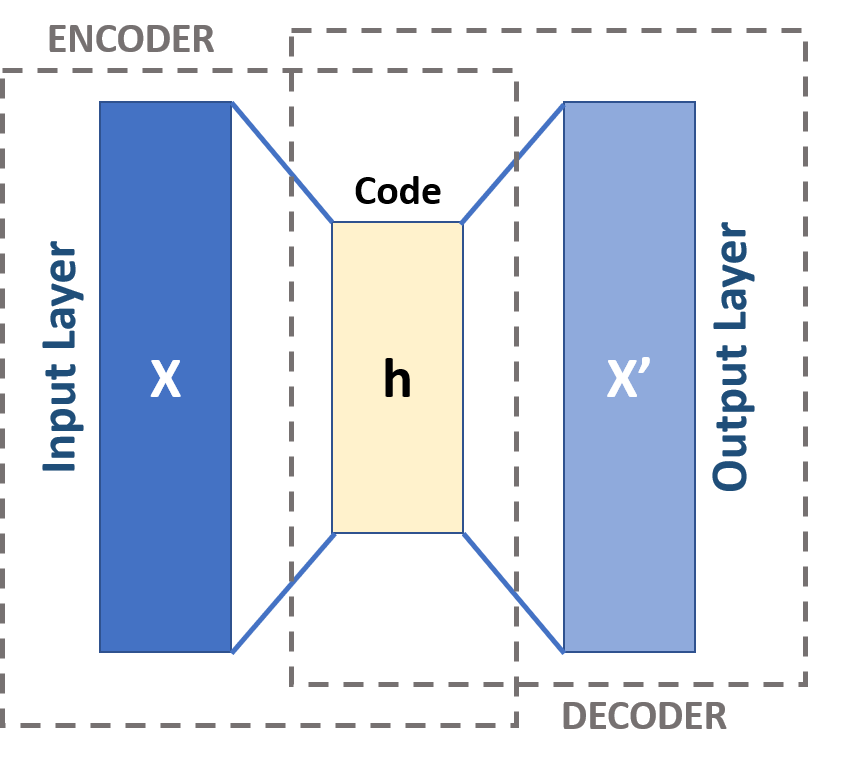

This idea can be used to do a nonlinear reduction in the dimensionality of the input.  Just construct an inner layer of fewer units than the dimensionality of the input.  This inner, often the middle, layer is usually the narrowest one in the network.  It is often called the bottleneck.

## Geographical Origin of Music Data Set

Let's play with this idea using [this data](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music#). Features are attributes of music and the last two are latitude and longitude of origin of music.

In [2]:
d = pandas.read_csv('default_plus_chromatic_features_1059_tracks.txt', header=None)

In [3]:
d.shape

(1059, 118)

In [4]:
d.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,34.03,-6.85


In [5]:
d = d.values

In [6]:
d.shape

(1059, 118)

In [7]:
X = d[:, :-2]
T = d[:, -2:]
X.shape, T.shape

((1059, 116), (1059, 2))

Train an autoencoder with 2 units in bottle neck layer.

Epoch 5000: RMSE 0.480
Epoch 10000: RMSE 0.395
Epoch 15000: RMSE 0.338
Epoch 20000: RMSE 0.287
Epoch 25000: RMSE 0.245
Epoch 30000: RMSE 0.209
Epoch 35000: RMSE 0.184
Epoch 40000: RMSE 0.155
Epoch 45000: RMSE 0.142
Epoch 50000: RMSE 0.124


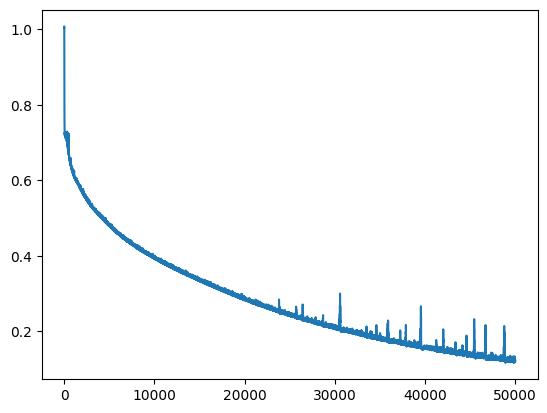

In [8]:
n_in = X.shape[1]
n_out = n_in
nnet = nntorch.NeuralNetwork(n_in, [1000, 100, 100, 2, 100, 100, 1000], n_out, device='cuda')

nnet.train(X, X, 50000, 0.001, method='adam', verbose=True)

plt.plot(nnet.error_trace)

How well does it learn the identity function?

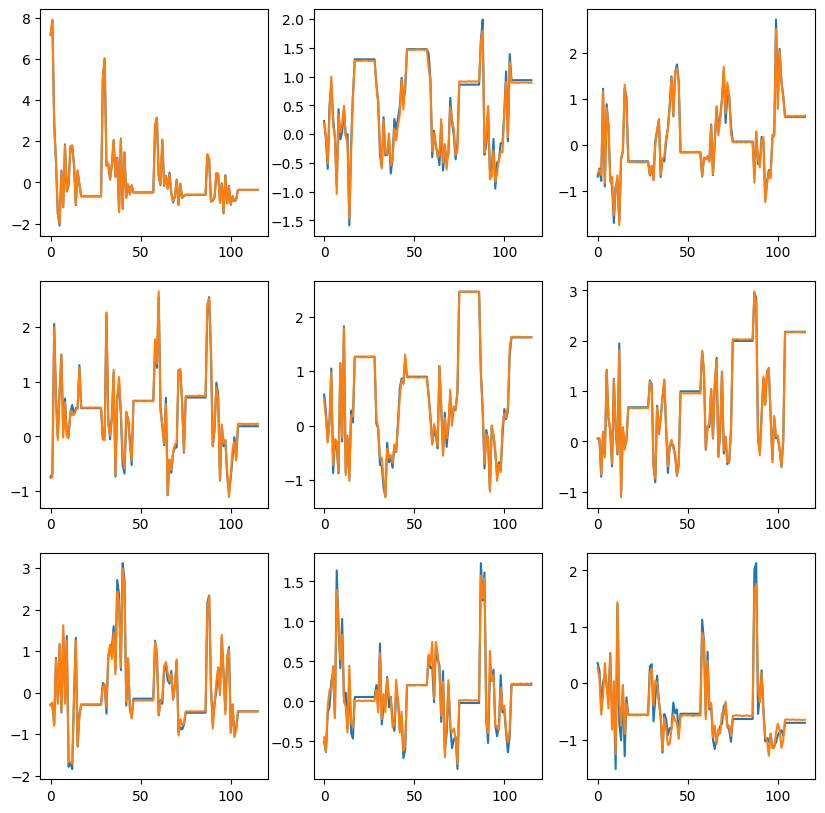

In [9]:
plt.figure(figsize=(10, 10))
Y = nnet.use(X)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(X[i, :])
    plt.plot(Y[i, :])

Pretty good match.

So where is each music sample project to in the two-dimensional plane formed by the bottleneck later?  First let's color the points by latitude.

In [10]:
middle = nnet.use_to_middle(X)
middle.shape

(1059, 2)

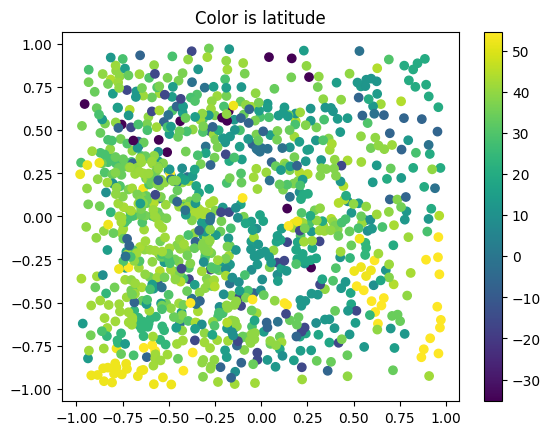

In [11]:
plt.scatter(middle[:, 0], middle[:, 1], c=T[:, 0])
plt.title('Color is latitude')
plt.colorbar();

Now color them by longitude.

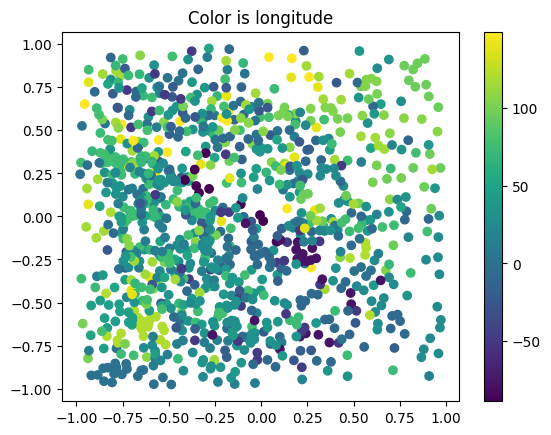

In [12]:
plt.scatter(middle[:, 0], middle[:, 1], c=T[:, 1])
plt.title('Color is longitude')
plt.colorbar();

Can we predict latitude and longitude using just the two values from the bottleneck layer?

Epoch 2000: RMSE 0.677
Epoch 4000: RMSE 0.610
Epoch 6000: RMSE 0.585
Epoch 8000: RMSE 0.569
Epoch 10000: RMSE 0.561
Epoch 12000: RMSE 0.555
Epoch 14000: RMSE 0.550
Epoch 16000: RMSE 0.546
Epoch 18000: RMSE 0.542
Epoch 20000: RMSE 0.539


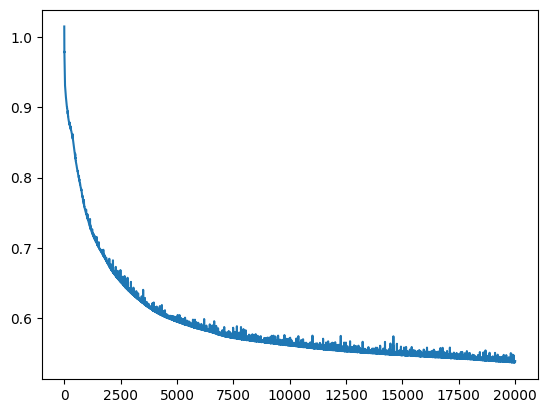

In [13]:
nnet_predict = nntorch.NeuralNetwork(2, [20, 20, 20], 2, device='cuda')
nnet_predict.train(middle, T, 20000, 0.01, method='adam')
plt.plot(nnet_predict.error_trace);

Final error is about 0.6.  Pretty good for latitude and longitude in range of 90 and 100.

(1059, 2)


(0.0, 200.0)

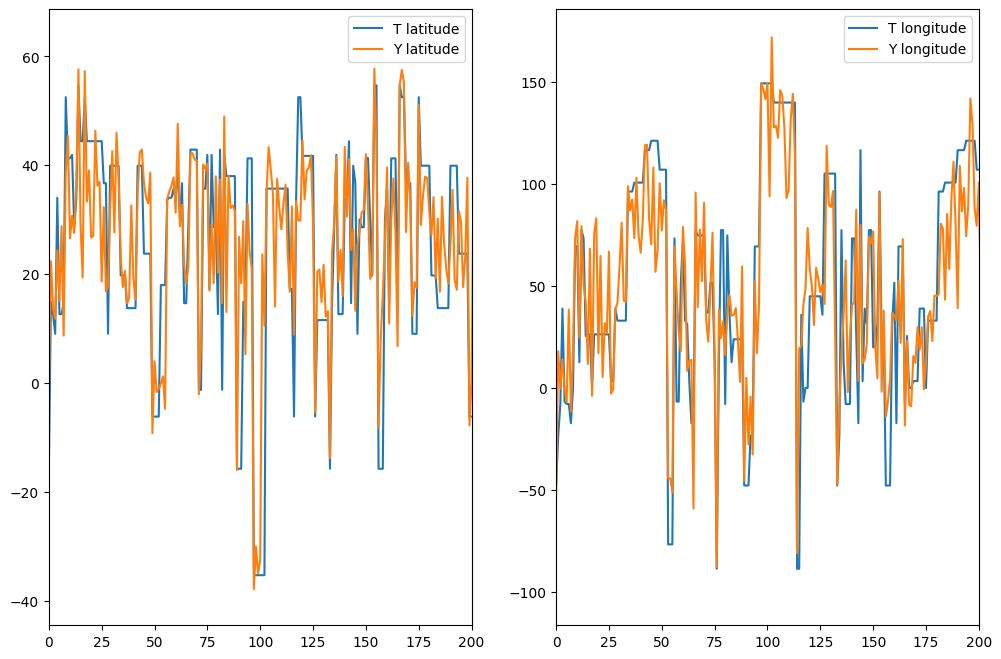

In [14]:
Y = nnet_predict.use(middle)
print(Y.shape)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(T[:, 0], label='T latitude')
plt.plot(Y[:, 0], label='Y latitude')
plt.legend()
plt.xlim(0, 200)
plt.subplot(1, 2, 2)
plt.plot(T[:, 1], label='T longitude')
plt.plot(Y[:, 1], label='Y longitude')
plt.legend()
plt.xlim(0, 200)

Text(0, 0.5, 'Predicted')

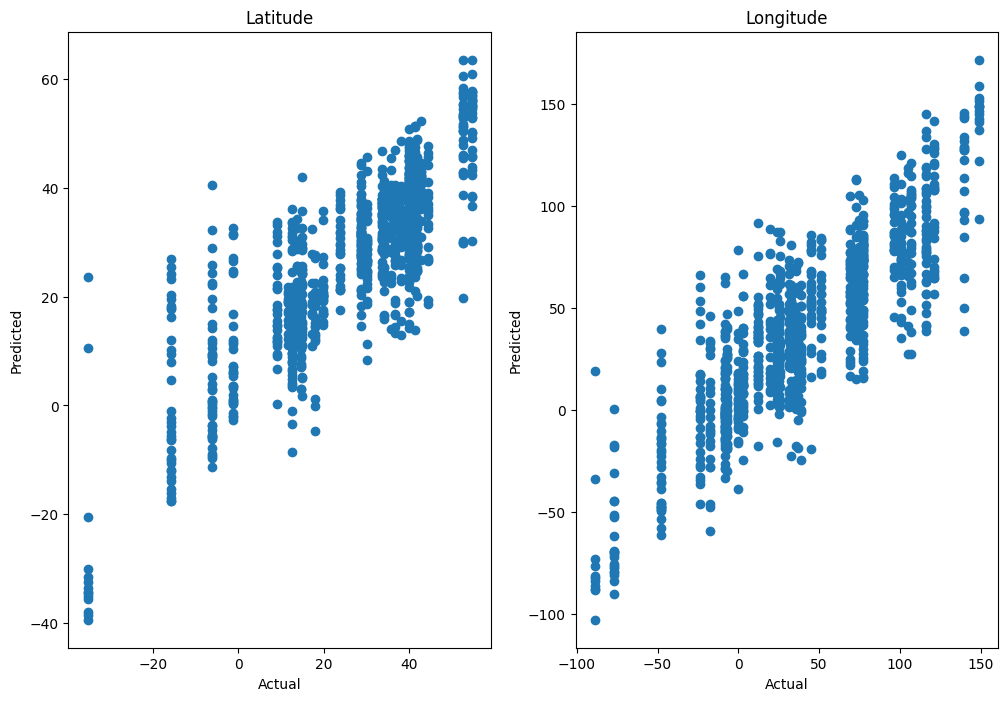

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(T[:, 0], Y[:, 0],'o')
plt.title('Latitude')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.plot(T[:, 1], Y[:, 1],'o')
plt.title('Longitude')
plt.xlabel('Actual')
plt.ylabel('Predicted')

How does this compare to predicting from original data?

Epoch 1000: RMSE 0.107
Epoch 2000: RMSE 0.077
Epoch 3000: RMSE 0.082
Epoch 4000: RMSE 0.051
Epoch 5000: RMSE 0.054
Epoch 6000: RMSE 0.057
Epoch 7000: RMSE 0.049
Epoch 8000: RMSE 0.066
Epoch 9000: RMSE 0.041
Epoch 10000: RMSE 0.046


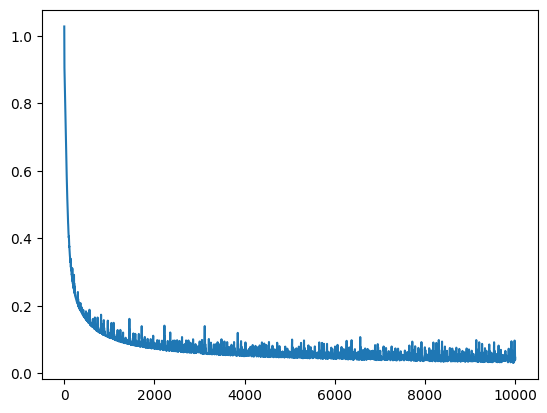

In [16]:
nnet_predict = nntorch.NeuralNetwork(X.shape[1], [20, 20], 2)
nnet_predict.train(X, T, 10000, 0.01, method='adam')
plt.plot(nnet_predict.error_trace);

(1059, 2)


(0.0, 200.0)

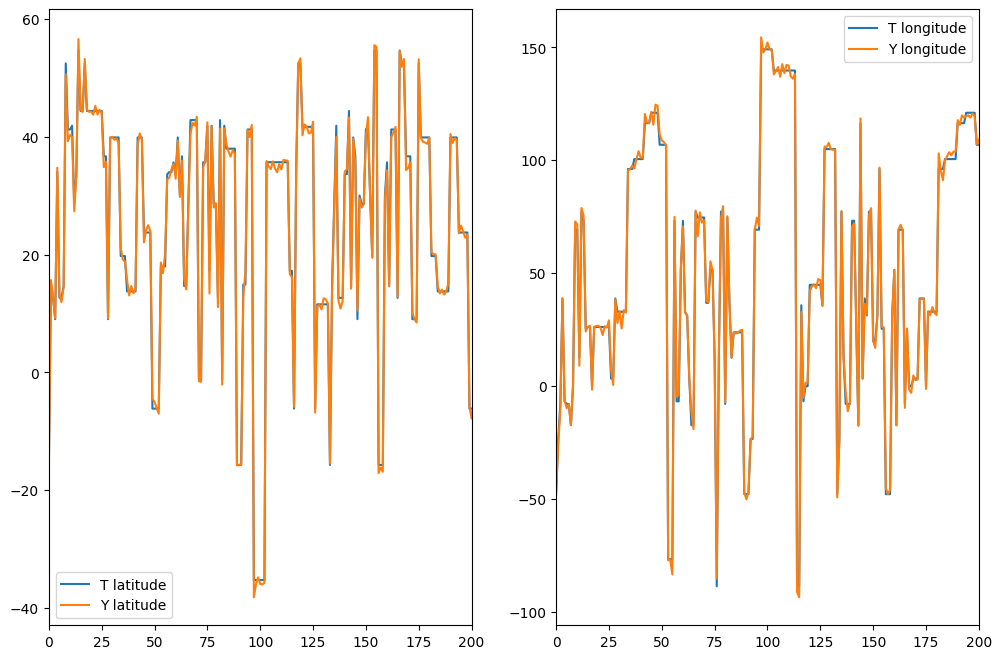

In [17]:
Y = nnet_predict.use(X)
print(Y.shape)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(T[:, 0], label='T latitude')
plt.plot(Y[:, 0], label='Y latitude')
plt.legend()
plt.xlim(0, 200)

plt.subplot(1, 2, 2)
plt.plot(T[:, 1], label='T longitude')
plt.plot(Y[:, 1], label='Y longitude')
plt.legend()
plt.xlim(0, 200)


Text(0, 0.5, 'Predicted')

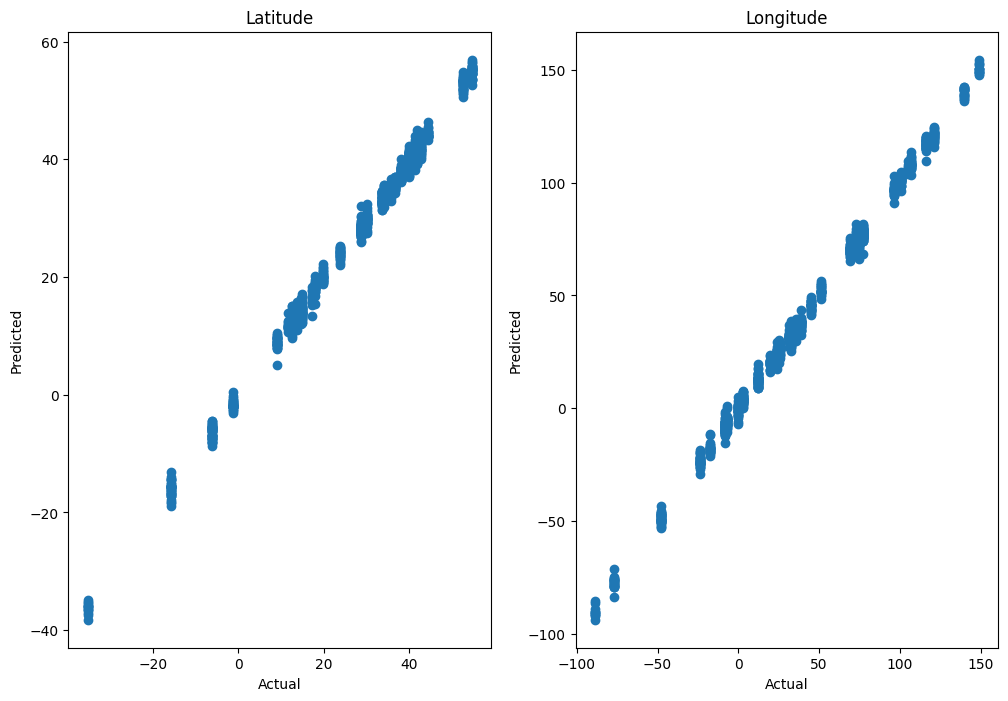

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(T[:, 0], Y[:, 0],'o')
plt.title('Latitude')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.plot(T[:, 1], Y[:, 1],'o')
plt.title('Longitude')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Epoch 5000: RMSE 0.135
Epoch 10000: RMSE 0.053
Epoch 15000: RMSE 0.032
Epoch 20000: RMSE 0.043
Epoch 25000: RMSE 0.020
Epoch 30000: RMSE 0.031
Epoch 35000: RMSE 0.018
Epoch 40000: RMSE 0.020
Epoch 45000: RMSE 0.023
Epoch 50000: RMSE 0.014


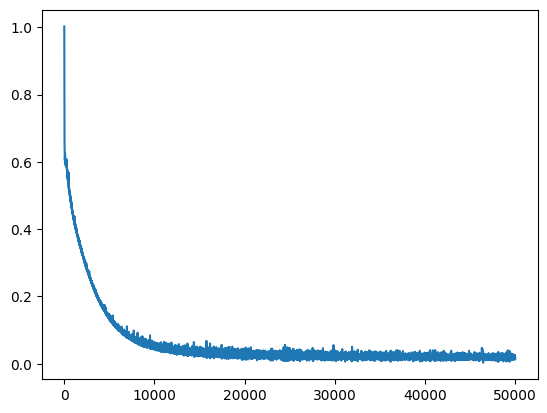

In [19]:
n_in = X.shape[1]
n_out = n_in
nnet = nntorch.NeuralNetwork(n_in, [1000, 100, 100, 5, 100, 100, 1000], n_out, device='cuda')

nnet.train(X, X, 50000, 0.001, method='adam', verbose=True)

plt.plot(nnet.error_trace)

Epoch 2000: RMSE 0.328
Epoch 4000: RMSE 0.297
Epoch 6000: RMSE 0.284
Epoch 8000: RMSE 0.277
Epoch 10000: RMSE 0.273
Epoch 12000: RMSE 0.269
Epoch 14000: RMSE 0.269
Epoch 16000: RMSE 0.268
Epoch 18000: RMSE 0.267
Epoch 20000: RMSE 0.269


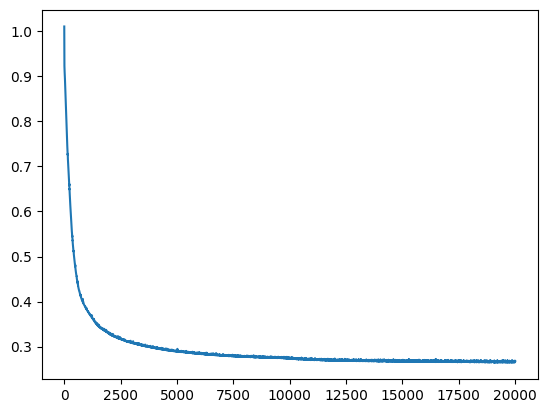

In [21]:
middle = nnet.use_to_middle(X)
nnet_predict = nntorch.NeuralNetwork(5, [20, 20, 20], 2, device='cuda')
nnet_predict.train(middle, T, 20000, 0.01, method='adam')
plt.plot(nnet_predict.error_trace);

(1059, 2)


(0.0, 200.0)

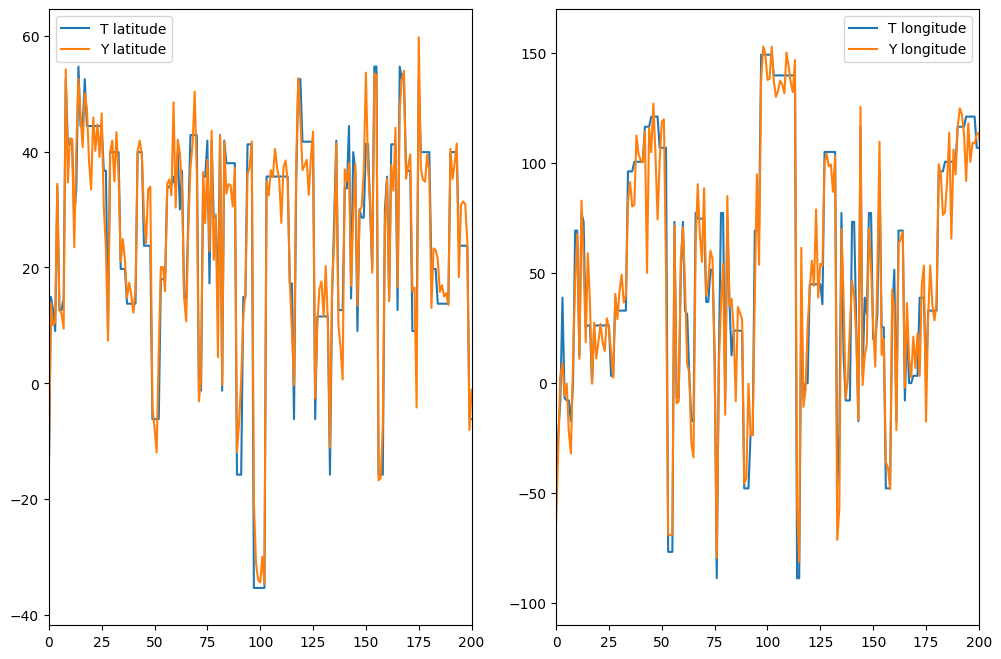

In [22]:
Y = nnet_predict.use(middle)
print(Y.shape)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(T[:, 0], label='T latitude')
plt.plot(Y[:, 0], label='Y latitude')
plt.legend()
plt.xlim(0, 200)
plt.subplot(1, 2, 2)
plt.plot(T[:, 1], label='T longitude')
plt.plot(Y[:, 1], label='Y longitude')
plt.legend()
plt.xlim(0, 200)

With 2 units in the bottleneck, we are not able to predict latitude and longitude nearly as well as with the full dimension of the data.  But, as we saw in class, if we use 5 units in that bottleneck layer we do much better!

Now let's switch from a regression problem to a classification problem and use the MNIST digit dataset.

## MNIST Data set

In [26]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1]

Xtest = test_set[0]
Ttest = test_set[1]

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000,), (10000, 784), (10000,))

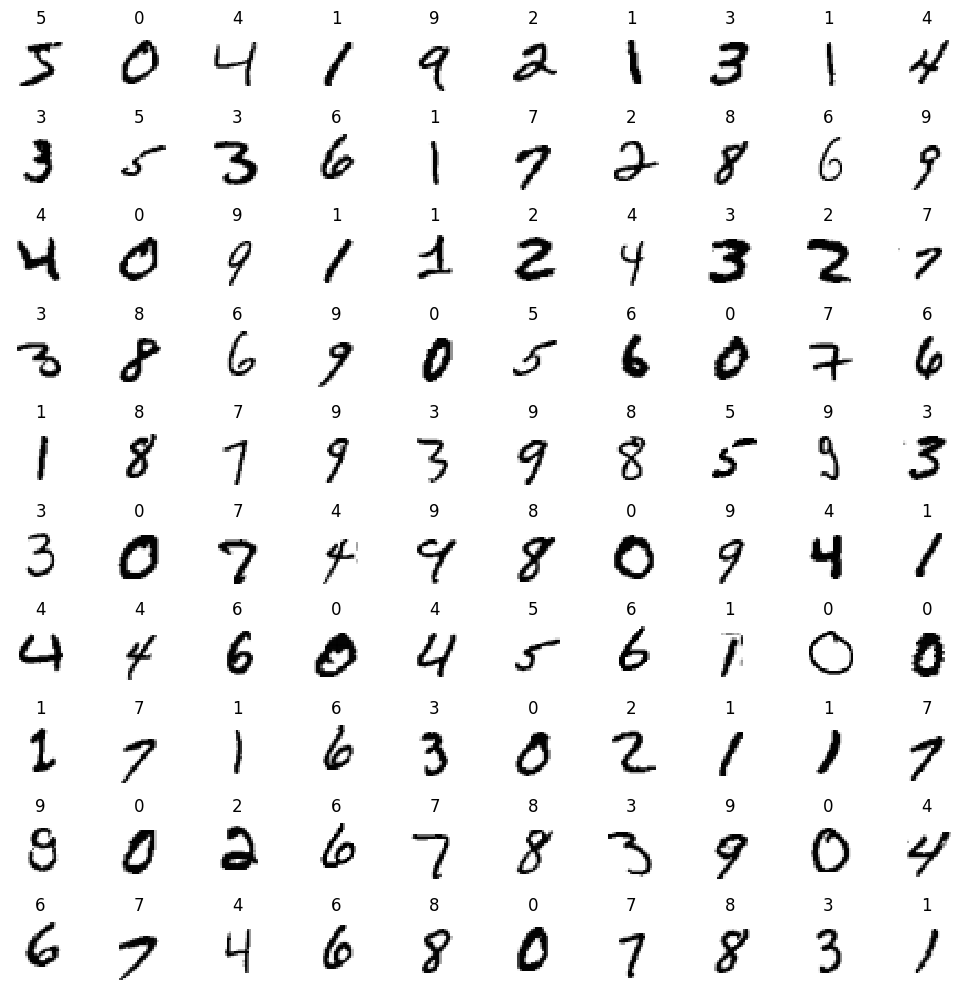

In [27]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(-Xtrain[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')
    plt.title(str(Ttrain[i]))
plt.tight_layout()

Let's again try to squeeze the data through a narrow layer of 2 units.

Epoch 500: RMSE 0.221
Epoch 1000: RMSE 0.207
Epoch 1500: RMSE 0.199
Epoch 2000: RMSE 0.195
Epoch 2500: RMSE 0.193
Epoch 3000: RMSE 0.190
Epoch 3500: RMSE 0.189
Epoch 4000: RMSE 0.187
Epoch 4500: RMSE 0.186
Epoch 5000: RMSE 0.185


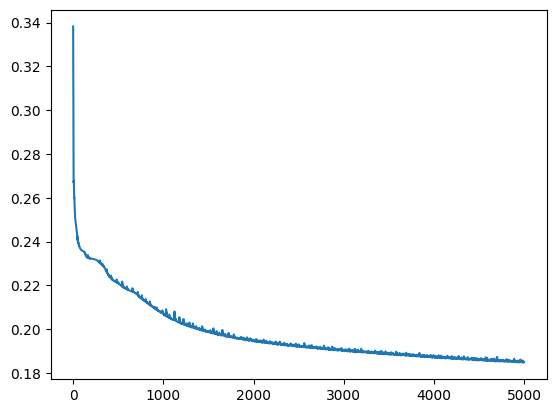

In [28]:
n_in = Xtrain.shape[1]
nnet = nntorch.NeuralNetwork(n_in, [500, 100, 50, 50, 2, 50, 50, 100, 500], n_in, device='cuda')
nnet.train(Xtrain, Xtrain, 5000, 0.001, method='adam', standardize='')
plt.plot(nnet.error_trace);

In [29]:
Ytest = nnet.use(Xtest)

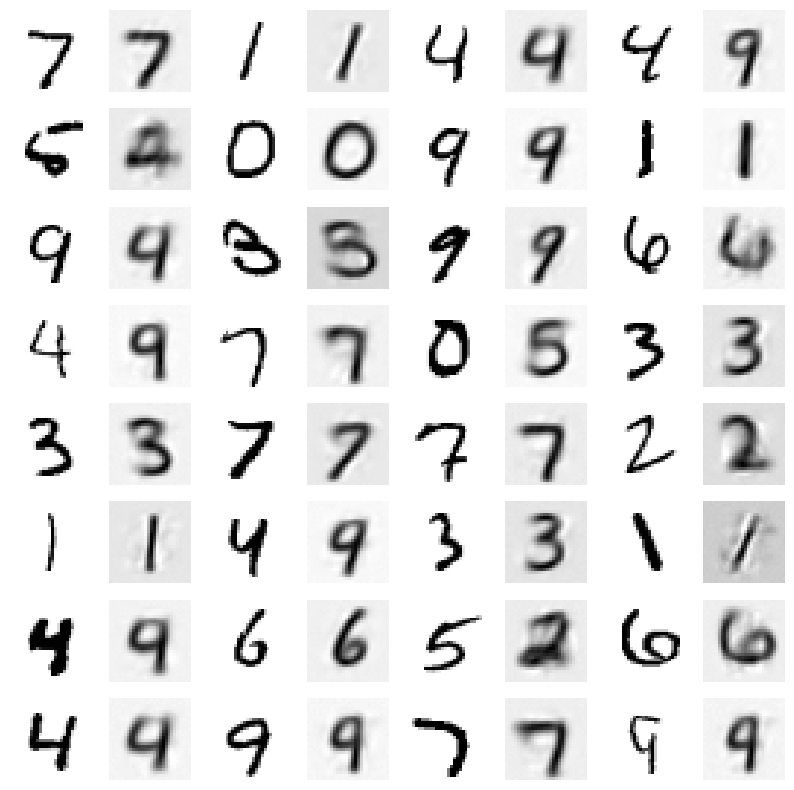

In [30]:
plt.figure(figsize=(10, 10))
for i in range(0, 64, 2):
    plt.subplot(8, 8, i + 1)
    plt.imshow(-Xtest[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')
    plt.subplot(8, 8, i + 2)
    plt.imshow(-Ytest[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

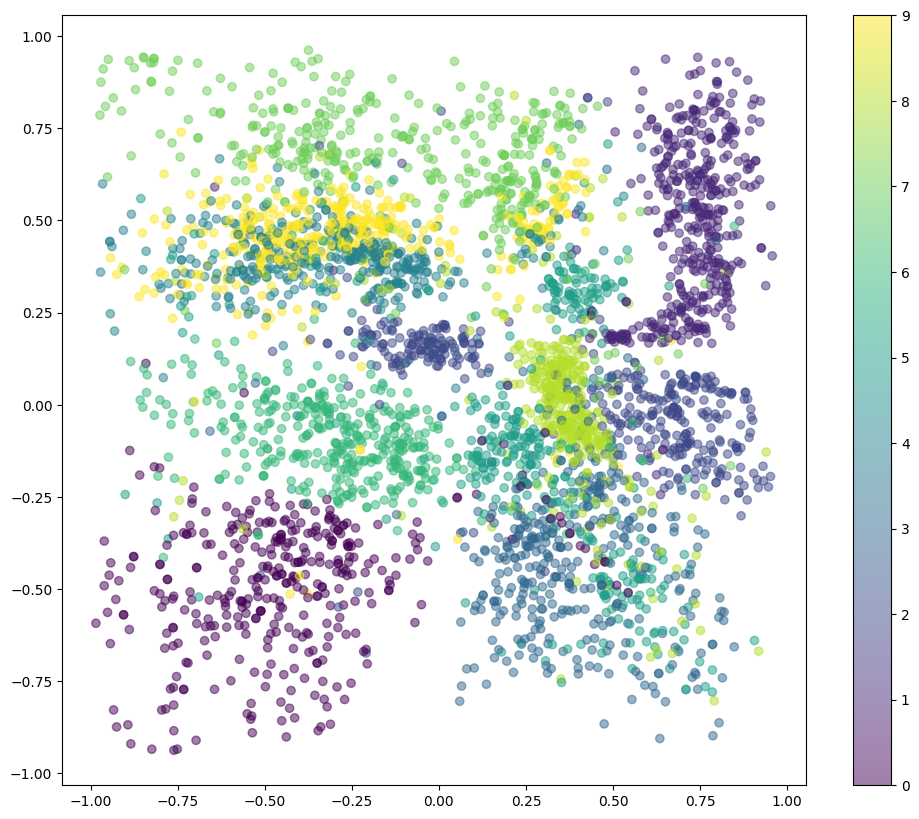

In [31]:
bottle_neck_train = nnet.use_to_middle(Xtrain)
bottle_neck_test = nnet.use_to_middle(Xtest)

show_n = 2000

show_these_train = np.random.choice(range(Ttrain.shape[0]), show_n)
show_these_test = np.random.choice(range(Ttest.shape[0]), show_n)

plt.figure(figsize=(12, 10))
plt.scatter(bottle_neck_train[show_these_train, 0], bottle_neck_train[show_these_train, 1],
            c=Ttrain[show_these_train].flat, alpha=0.5)
plt.scatter(bottle_neck_test[show_these_test, 0], bottle_neck_test[show_these_test, 1],
            c=Ttest[show_these_test].flat, alpha=0.5)
plt.colorbar();

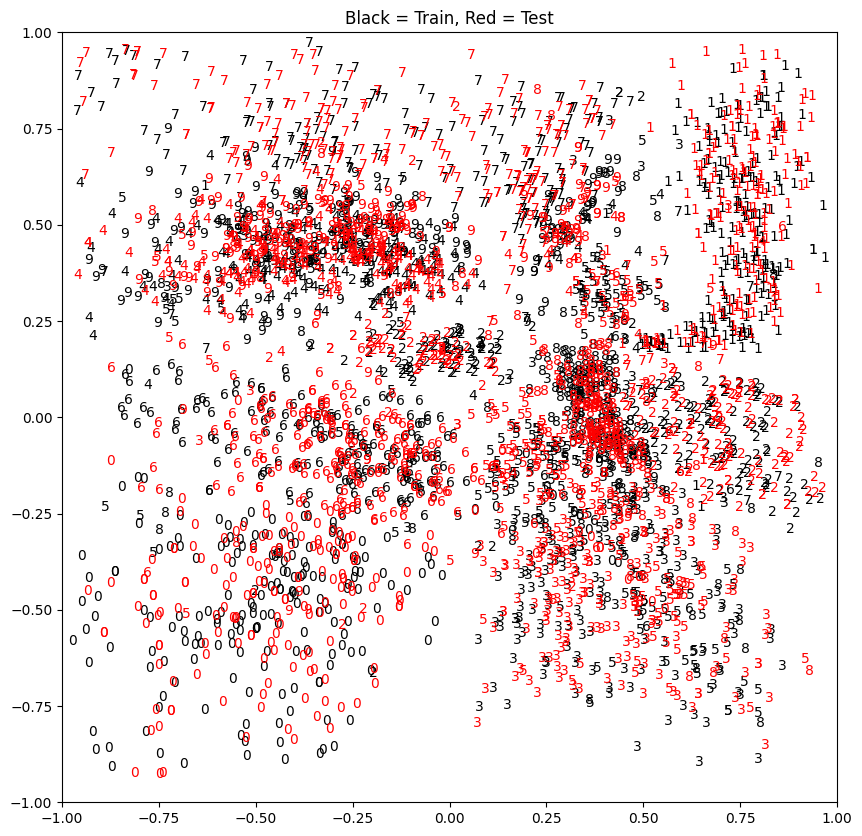

In [32]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
for i in show_these_train:
    digit = Ttrain[i]
    plt.annotate(digit, bottle_neck_train[i, :])
for i in show_these_test:
    digit = Ttest[i]
    plt.annotate(digit, bottle_neck_test[i, :], color='r');
plt.title('Black = Train, Red = Test');

In [33]:
def add_subplot_axes(ax, rect, axisbg='w'):
    ''' See http://stackoverflow.com/questions/17458580/embedding-small-plots-inside-subplots-in-matplotlib'''
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x, y, width, height], facecolor=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

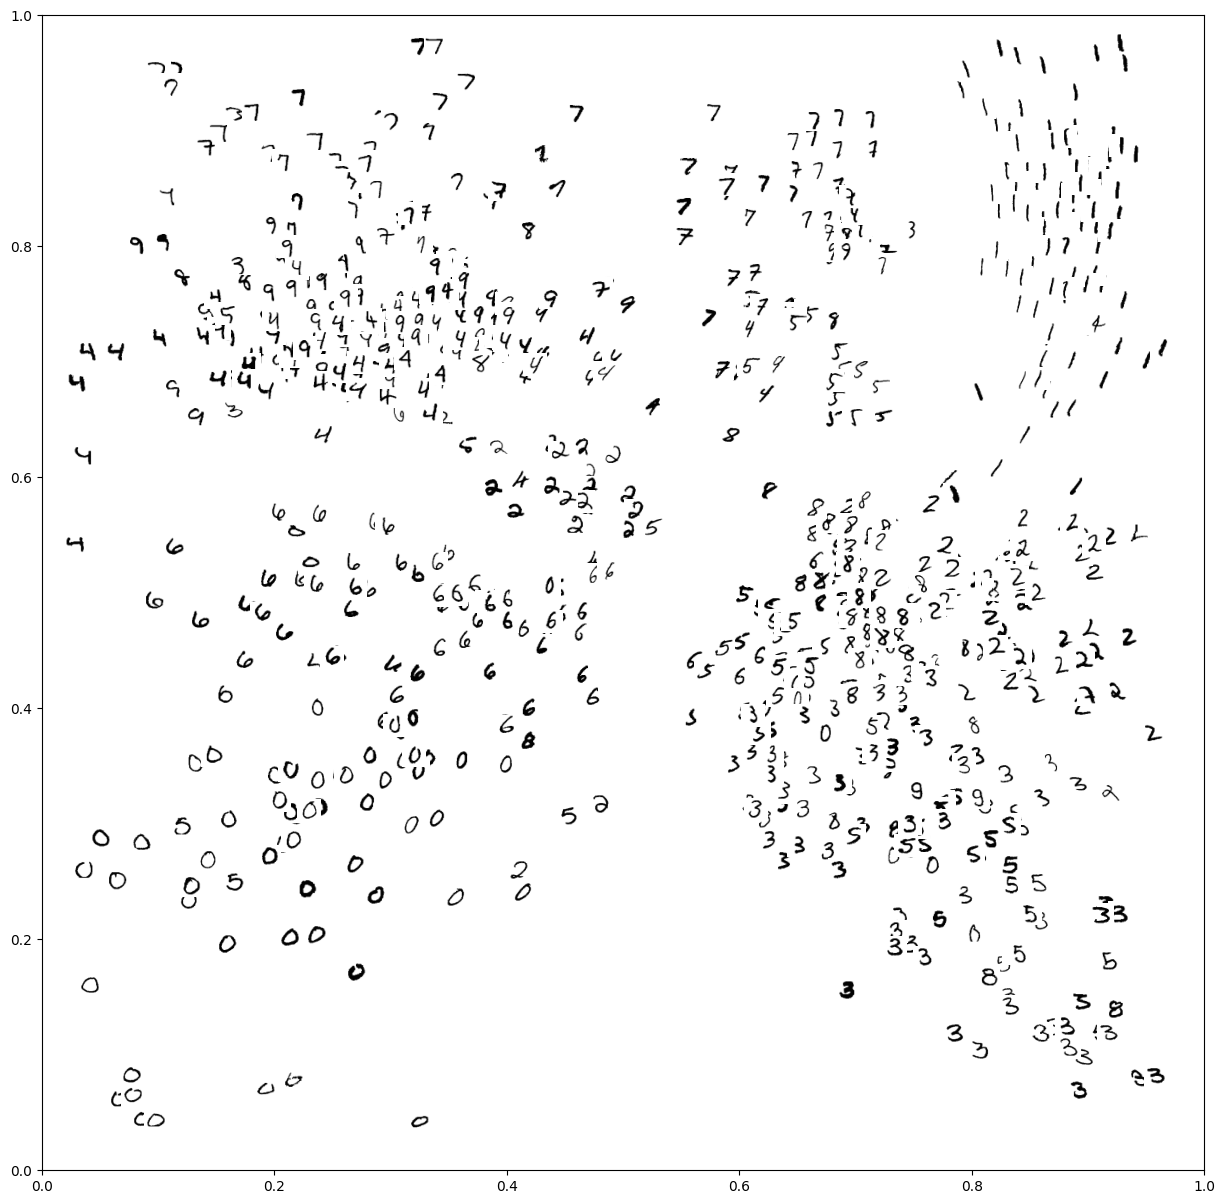

In [34]:
fig, main_ax = plt.subplots(figsize=(15, 15))

for i in range(800):
    Xi = Xtest[i, :].reshape(28, 28)
    Ti = Ttest[i]
    coords = bottle_neck_test[i, :] * 0.5 + 0.5
    ax = add_subplot_axes(main_ax, [coords[0], coords[1], 0.02, 0.02])
    ax.imshow(-Xi, cmap='gray')
    ax.axis('off')